<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Rizdha !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Rizdha ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Rizdha dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

Saat ini kita bekerja untuk menyelesaikan proyek menganalisa dapat efek cuaca terhadap waktu perjalanan.
Langkah-langkah yang kita lakukan untuk menyelesaikan proyek ini :
- mengimpor kedua file
- mempelajari isi data
- memastikan tipe datanya sudah benar
- mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran
- membuat grafik: perusahaan taksi dan jumlah perjalanannya, 10 wilayah teratas berdasarkan jumlah pengantaran
- menarik kesimpulan berdasarkan grafik yang sudah dibuat dan menjelaskan hasilnya

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Pra Pemrosesan Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df_company = pd.read_csv('/datasets/project_sql_result_01.csv')
df_dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
df_hypo = pd.read_csv('/datasets/project_sql_result_07.csv')

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Mempelajari Data

### Company Data
#### Deskripsi Data
company_name: nama perusahaan taksi
trips_amount: jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.

In [3]:
df_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [4]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
df_company['company_name'].sort_values().unique()

array(['0118 - 42111 Godfrey S. Awir', '1085 - 72312 N and W Cab Co',
       '1469 - 64126 Omar Jada', '2092 - 61288 Sbeih Company',
       '2192 - 73487 Zeymane Corp', '2241 - 44667 - Felman Corp',
       '24 Seven Taxi', '2733 - 74600 Benny Jona',
       '2809 - 95474 C & D Cab Co Inc.', '2823 - 73307 Lee Express Inc',
       '3011 - 66308 JBL Cab Inc.', '303 Taxi',
       '3556 - 36214 RC Andrews Cab', '3591 - 63480 Chuks Cab',
       '3620 - 52292 David K. Cab Corp.',
       '3623 - 72222 Arrington Enterprises', '3721 - Santamaria Express',
       '4053 - 40193 Adwar H. Nikola', '4615 - 83503 Tyrone Henderson',
       '4623 - 27290 Jay Kim', '5 Star Taxi', '5006 - 39261 Salifu Bawa',
       '5062 - 34841 Sam Mestas', '5074 - 54002 Ahzmi Inc',
       '5874 - 73628 Sergey Cab Corp.', '5997 - 65283 AW Services Inc.',
       '6057 - 24657 Richard Addo', '6574 - Babylon Express Inc.',
       '6742 - 83735 Tasha Ride Inc', '6743 - 78771 Luhak Corp',
       'American United', 'American Un

In [6]:
df_company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [7]:
df_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


- Company Data tidak memiliki data yang hilang
- Tipe data sudah sesuai yakni untuk kolom 'company_name' memiliki tipe data object, dan untuk kolom 'trips_amount' memiliki tipe data int

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Dropoff Data
#### Deskripsi Data
dropoff_location_name: nama wilayah di Chicago tempat perjalanan berakhir
average_trips: jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.

In [8]:
df_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [9]:
df_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
df_dropoff['dropoff_location_name'].sort_values().unique()

array(['Albany Park', 'Andersonville', 'Archer Heights', 'Armour Square',
       'Ashburn', 'Auburn Gresham', 'Austin', 'Avalon Park', 'Avondale',
       'Belmont Cragin', 'Beverly', 'Boystown', 'Bridgeport',
       'Brighton Park', 'Bucktown', 'Burnside', 'Calumet Heights',
       'Chatham', 'Chicago Lawn', 'Chinatown', 'Clearing', 'Douglas',
       'Dunning', 'East Side', 'East Village', 'Edgewater', 'Edison Park',
       'Englewood', 'Fuller Park', 'Gage Park', 'Garfield Park',
       'Garfield Ridge', 'Gold Coast', 'Grand Boulevard',
       'Grand Crossing', 'Grant Park', 'Hegewisch', 'Hermosa',
       'Humboldt Park', 'Hyde Park', 'Irving Park', 'Jackson Park',
       'Jefferson Park', 'Kenwood', 'Lake View', 'Lincoln Park',
       'Lincoln Square', 'Little Italy, UIC', 'Little Village',
       'Logan Square', 'Loop', 'Lower West Side', 'Mckinley Park',
       'Montclare', 'Morgan Park', 'Mount Greenwood', 'Museum Campus',
       'Near South Side', 'New City', 'North Center', 'Nor

In [11]:
df_dropoff.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [12]:
df_dropoff.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


- Dropoff Data tidak memiliki data yang hilang
- Tipe data untuk kolom 'dropoff_location_name' memiliki tipe data object, dan untuk kolom 'trips_amount' memiliki tipe data float sehingga kita harus memperbaiki terlebih dahulu menjadi tipe data int

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Hypotesis Data
#### Deskripsi Data
start_ts : tanggal dan waktu penjemputan
weather_conditions : kondisi cuaca saat perjalanan dimulai
duration_seconds : durasi perjalanan dalam satuan detik

In [13]:
df_hypo

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [14]:
df_hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [15]:
df_hypo.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [16]:
df_hypo.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


- Hypotesis Data tidak memiliki data yang hilang
- Tipe data untuk kolom 'weather_conditions' memiliki tipe data object, kolom 'duration_seconds' memiliki tipe data float, dan untuk kolom 'start_ts' tipe datanya object sehingga kita harus perbaiki menjadi tipe data datetime

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

#  Memperbaiki Data

In [17]:
#memperbaiki tipe data df_dropoff average_trips menjadi int
df_dropoff['average_trips'] = df_dropoff['average_trips'].apply(np.ceil).astype('int')

In [18]:
df_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [19]:
#memperbaiki tipe data df_hypo starts_ts menjadi datetime
df_hypo['start_ts'] = df_hypo['start_ts'].astype('datetime64')

In [20]:
df_hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Analisis Data

### 10 wilayah teratas yang dijadikan sebagai titik pengantaran

In [21]:
top_dropoff = df_dropoff.sort_values(by='average_trips', ascending=False).head(10)
top_dropoff

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1365
9,Sheffield & DePaul,1260


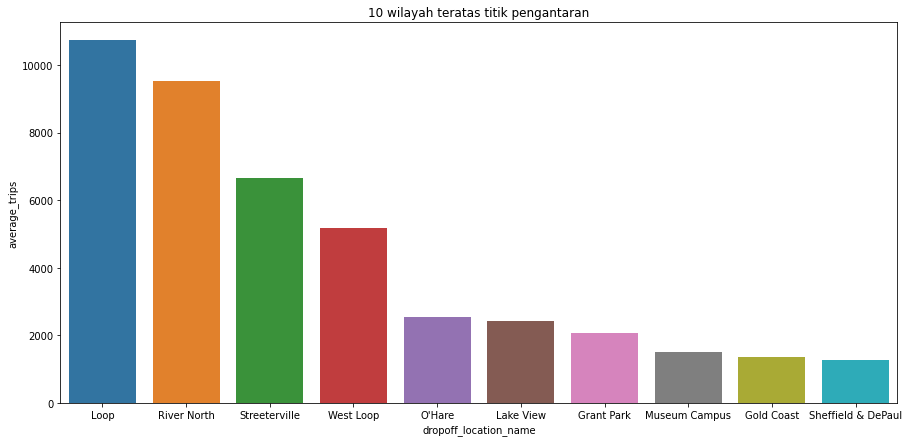

In [22]:
plt.figure(figsize=(15,7),frameon=True)
plt.title('10 wilayah teratas titik pengantaran')
sns.barplot(data = top_dropoff, x='dropoff_location_name',y='average_trips')

plt.show()

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### 10 perusahaan teratas berdasarkan jumlah pengantaran

In [23]:
top_company = df_company.sort_values(by='trips_amount', ascending=False).head(10)
top_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


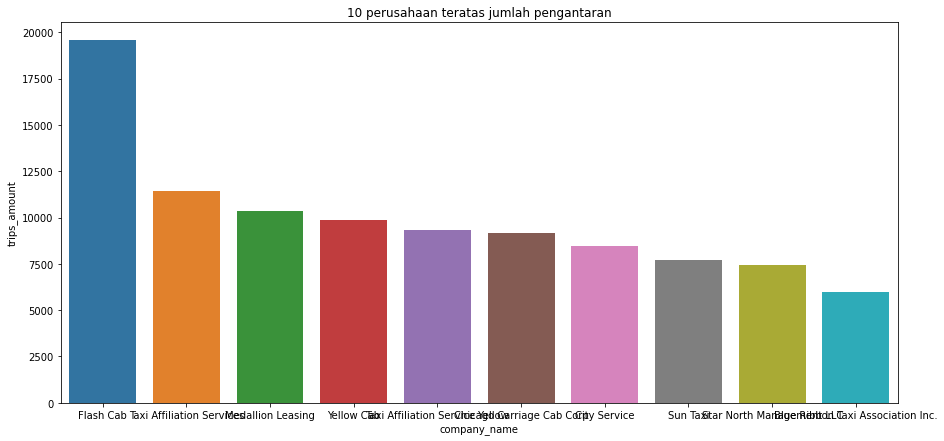

In [24]:
plt.figure(figsize=(15,7),frameon=True)
plt.title('10 perusahaan teratas jumlah pengantaran')
sns.barplot(data = top_company, x='company_name',y='trips_amount')

plt.show()

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Menguji Hipotesis

Mengkategorikan data berdasarkan kondisi cuaca

In [25]:
df_hypo.groupby('weather_conditions').agg(amount=('start_ts','count'), avg_sec=('duration_seconds', 'mean'),
                                             total_sec=('duration_seconds',
                                            'sum')).reset_index()

,weather_conditions,amount,avg_sec,total_sec
0,Bad,180,2427.205556,436897.0
1,Good,888,1999.675676,1775712.0


Memeriksa outlier

In [26]:
# menentukan batas atas dan bawah
def batas_atas(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    batas_atas = Q3 + (1.5 * IQR)
    return batas_atas
#Fungsi Batas bawah sebuah Outlier
def batas_bawah(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - (1.5 * IQR)
    return batas_bawah

In [28]:
upper_bound = batas_atas(df_hypo['duration_seconds'])
lower_bound = batas_bawah(df_hypo['duration_seconds'])

print('Batas bawah =',lower_bound)
print('Batas atas =',upper_bound)

Batas bawah = -274.375
Batas atas = 4292.625


Karena batas bawah bernilai negatif, maka batas bawah akan diubah menjadi 0

In [29]:
df_hypoclean = df_hypo[(df_hypo['duration_seconds'] > 0) &
                      (df_hypo['duration_seconds'] < upper_bound)]

In [30]:
df_hypoclean.groupby('weather_conditions').agg(amount=('start_ts','count'), avg_sec=('duration_seconds', 'mean'),
                                            total_sec=('duration_seconds','sum')).reset_index()

,weather_conditions,amount,avg_sec,total_sec
0,Bad,179,2412.944134,431917.0
1,Good,877,1992.807298,1747692.0


Setelah membersihkan outlier dapat dilihat bahwa total pengantaran pada kondisi cuaca baik adalah 877, dan pada kondisi cuaca buruk adalah 179

In [31]:
df_weather_good = df_hypoclean.query('weather_conditions == "Good"').reset_index(drop=True)
df_weather_bad = df_hypoclean.query('weather_conditions == "Bad"').reset_index(drop=True)

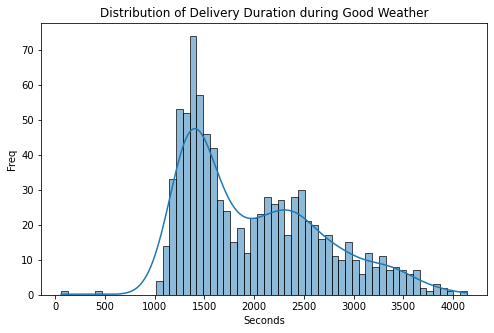

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df_weather_good['duration_seconds'], bins=60, kde=True)
plt.xlabel('Seconds')
plt.ylabel('Freq')
plt.title('Distribution of Delivery Duration during Good Weather')
plt.show()

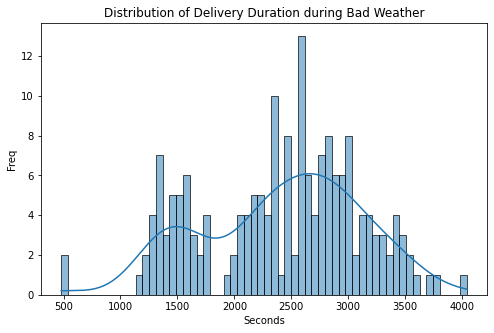

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(df_weather_bad['duration_seconds'], bins=60, kde=True)
plt.xlabel('Seconds')
plt.ylabel('Freq')
plt.title('Distribution of Delivery Duration during Bad Weather')
plt.show()

###"Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu." 

H₀ : Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare tidak berubah saat hujan di hari Sabtu
H₁ : Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

In [35]:
# Menentukan jika kedua sample memiliki variasi yang seimbang atau tidak
st.levene(df_weather_good['duration_seconds'], df_weather_bad['duration_seconds'])

LeveneResult(statistic=0.07177794768773813, pvalue=0.7888178851804917)

pvalue = 0.78, kita dapat menentukan kedua sample memiliki variasi yang sama, karena nilainya lebih tinggi dari alpha yang ditentukan

In [37]:
# Test the hypothesis

alpha = 0.05
results = st.ttest_ind(df_weather_good['duration_seconds'], df_weather_bad['duration_seconds'], equal_var=True)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print("Kita tidak menolak hipotesis nol")

p-value: 2.3968233040077725e-13
Kita menolak hipotesis nol


From the test above, we found that The average duration of a trip from the Loop to O'Hare International Airport changes on rainy Saturdays, so we can conclude that weather conditions affect the duration of the trip, which in rainy weather conditions will take an average of 7-8 minutes longer.
Berdasarkan hasil pengujian hipotesis yang telah dilakukan, kita menyimpulkan Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu. Jadi analisa data yang kita lakukan terhadap efek cuaca terhadap durasi perjalanan terbukti benar dengan rata-rata durasi perjalanan lebih lama 420 detik atau 7 menit 

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Kesimpulan

- Berdasarkan analisa yang telah kita lakukan, cuaca berdampak pada durasi perjalanan yang dilakukan. Dimana rata-rata perjalanan dengan cuaca buruk lebih lama 7 menit
- Di wilayah Chicago, tempat yang palings sering dijadikan titik pengantaran adalah Loop dengan 10728 pengantaran,River North dengan 9524 pengantaran, dan Streeterville dengan 6665 pengantaran
- Dan perusahaan taksi yang palings sering digunakan oleh penumpang adalah Flash Cab dengan 19558 pengantaran, Taxi Affiliation Services dengan 11422 pengantaran, dan Medallion Leasing dengan 10367 pengantaran

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>